In [27]:
import CalculatedFieldSubroutines as cfs

#

import numpy as np

import pandas as pd

#

from pandasgui import show

#

import warnings

#

import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings( 'ignore' )

In [3]:
gmIDs = cfs.list_gmIDs()

In [9]:
topics = cfs.list_topics()

In [11]:
print( topics )

['/apollo/canbus/chassis', '/apollo/drive/event', '/apollo/sensor/gnss/best/pose', '/apollo/perception/traffic/light']


In [16]:
gmID_57_df = cfs.retrieve_gmID_topic( gmID = gmIDs[ 70 ], topic = '/apollo/canbus/chassis' )

In [22]:
all_chassis_dfs = []

for gmID in gmIDs:

    temp_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis' )

    all_chassis_dfs.append( temp_df )

In [49]:
chassis_106_df = all_chassis_dfs[ 107 ]

In [50]:
chassis_106_df = chassis_106_df.sort_values( 'time' )

In [53]:
chassis_106_driving_mode_column = list( chassis_106_df[ 'drivingMode' ] )

In [55]:
chassis_106_df[ 'example' ] = [ 'abc'  for x in range( len( chassis_106_driving_mode_column ) ) ]

In [59]:
new_column = []

for driving_mode in chassis_106_driving_mode_column:

    if ( driving_mode == 'COMPLETE_MANUAL' ):

        new_column.append( 0 )

    else:

        new_column.append( 'something' )

In [60]:
chassis_106_df[ 'BinaryDrivingMode' ] = new_column

In [61]:
show( chassis_106_df )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [41]:
speeds = chassis_106_df[ 'speedMps' ]

In [42]:
times = chassis_106_df[ 'time' ]

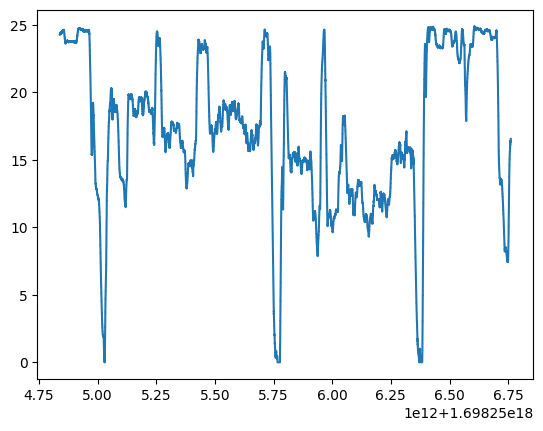

In [43]:
plt.plot( times, speeds )

plt.show()

In [70]:
chassis_df_124 = all_chassis_dfs[ 150 ]

In [72]:
chassis_df_124 = chassis_df_124.sort_values( 'time' )

In [75]:
show( chassis_df_124 )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [73]:
cfs.BinaryDrivingMode( chassis_df_124 )

In [74]:
cfs.TernaryDrivingModeTransition( chassis_df_124 )

In [ ]:
#

In [84]:
chassis_df_151 = cfs.retrieve_gmID_topic( gmIDs[ 150 ], '/apollo/canbus/chassis' )

chassis_df_151 = chassis_df_151.sort_values( 'time' )

In [85]:
cfs.BinaryDrivingMode( chassis_df_151 )

In [86]:
best_pose_df_151 = cfs.retrieve_gmID_topic( gmIDs[ 150 ], '/apollo/sensor/gnss/best/pose' )

best_pose_df_151 = best_pose_df_151.sort_values( 'time' )

In [88]:
cfs.ChassisBestPoseMatchedTime( chassis_df_151, best_pose_df_151 )

In [90]:
merged_df = pd.merge( chassis_df_151, best_pose_df_151, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

In [95]:
show( chassis_df_151, best_pose_df_151 )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [ ]:
merged_df[ 'numSatsInSolution' ]

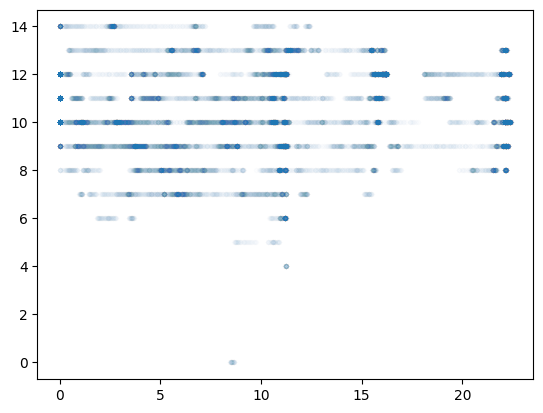

In [96]:
plt.plot( merged_df[ 'speedMps' ], merged_df[ 'numSatsInSolution' ], marker = '.', ls = '', alpha = 0.01 )

plt.show()